In [60]:
import numpy as np
import pywt
import os
from PIL import Image
from matplotlib import pyplot as plt


image = 'mis1.jpg'   
watermark = 'qrcode.png' 



In [61]:
def convert_image(image_name, size):
    img = Image.open('./dataset/' + image_name).resize((size, size))
    img = img.convert('L')
    plt.imshow(img,cmap='gray')
    plt.show()
    image_array = np.array(img)
    image_array = np.float32(image_array) 
    image_array /= 255 
    return image_array



In [62]:
def process_coefficients(imArray, model, level):
    coeffs=pywt.wavedec2(data = imArray, wavelet = model, level = level)
    # print coeffs[0].__len__()
    coeffs_H=list(coeffs) 
   
    return coeffs_H




In [63]:
def embed_mod2(coeff_image, coeff_watermark, offset=0):
    for i in range(coeff_watermark.__len__()):
        for j in range(coeff_watermark[i].__len__()):
            coeff_image[i*2+offset][j*2+offset] = coeff_watermark[i][j]

    return coeff_image

def embed_mod4(coeff_image, coeff_watermark):
    for i in range(coeff_watermark.__len__()):
        for j in range(coeff_watermark[i].__len__()):
            coeff_image[i*4][j*4] = coeff_watermark[i][j]

    return coeff_image
            
    
def embed_watermark(coeffs_image, coeffs_watermark):
    embed_mod4(coeffs_image[2][2], coeffs_watermark[0])
    embed_mod4(coeffs_image[2][1], coeffs_watermark[1][0])
    embed_mod4(coeffs_image[2][0], coeffs_watermark[1][1])
    embed_mod2(coeffs_image[1][0], coeffs_watermark[1][2])

def get_embeded(coeff_watermarked, mod=4, size=64):
    watermark = [[1 for x in range(size)] for y in range(size)]
    for i in range(size):
        for j in range(size):
            watermark[i][j] = coeff_watermarked[i*mod][j*mod]
    
    return watermark



In [64]:
def get_watermark(coeffs_watermarked_image): 
    watermark = []
    arr0 = get_embeded(coeffs_watermarked_image[2][2], mod=4, size=64)
    watermark.append(arr0)
    arr0 = get_embeded(coeffs_watermarked_image[2][1], mod=4, size=64)
    arr1 = get_embeded(coeffs_watermarked_image[2][0], mod=4, size=64)
    arr2 = get_embeded(coeffs_watermarked_image[1][0], mod=2, size=64)
    watermark.append((arr0, arr1, arr2))

    return watermark


def recover_watermark(model='haar'):
    img = Image.open('./result/image_with_watermark.jpg')
    img = img.convert('L')

    image_array = np.array(img)
    image_array = np.float32(image_array) 
    image_array /= 255 


    coeffs_watermarked_image = process_coefficients(image_array, model, level=2)
    coeffs_watermark = get_watermark(coeffs_watermarked_image)

    # watermark reconstruction
    watermark_array = pywt.waverec2(coeffs_watermark, model)
    watermark_array *= 255;
    watermark_array =  np.uint8(watermark_array)

#Save result
    img = Image.fromarray(watermark_array)
    img.save('./result/recovered_watermark.jpg')
    print('Recovered Water Marking')
    plt.imshow(img,cmap='gray')
    plt.show()
    



Cover Image


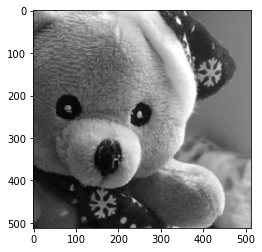

Water Mark


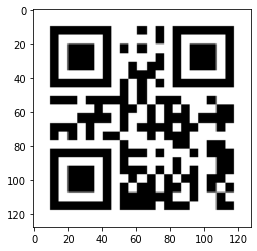

Image After Water Marking


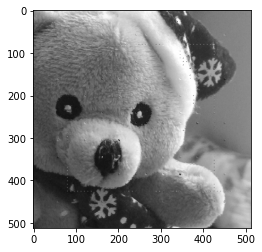

Recovered Water Marking


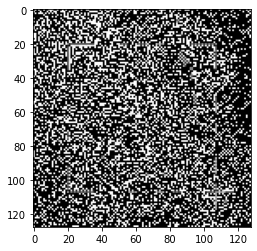

In [65]:
def w2d(img):
    model = 'haar'
    print('Cover Image')
    image_array = convert_image(image, 512)
    print('Water Mark')
    watermark_array = convert_image(watermark, 128)

    coeffs_image = process_coefficients(image_array, model, level=2)
    coeffs_watermark = process_coefficients(watermark_array, model, level=1)

    embed_watermark(coeffs_image, coeffs_watermark)


# reconstruction
    image_array_H=pywt.waverec2(coeffs_image, model)
    image_array_H *= 255;
    image_array_H =  np.uint8(image_array_H)

#Save result
    img = Image.fromarray(image_array_H)
    img.save('./result/image_with_watermark.jpg')
    print('Image After Water Marking')
    plt.imshow(img,cmap='gray')
    plt.show()


# recover images
    recover_watermark(model=model)


w2d("test")